In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("messy_data.csv", skipinitialspace=True, na_values=[''])

In [2]:
data

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.70,vvs2,E,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.20,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.90,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,NaN,62.4,59.0,2300.0
196,1.25,VVS2,H,Good,6.9,NaN,4.27,NaN,55.0,10400.0
197,0.55,i1,I,Premium,5.3,NaN,3.28,62.3,57.0,150000.0
198,0.85,Si2,E,fair,6.1,6.13,3.78,NaN,58.0,6300.0


In [20]:


for col in data.columns:
    print(data[col].value_counts())


0.50    13
0.55    12
0.40    10
0.45     9
1.05     8
0.65     8
0.70     8
0.75     8
0.85     7
1.30     7
0.60     7
0.90     7
1.20     6
0.95     6
1.40     5
1.15     5
1.25     4
0.80     4
0.35     4
1.10     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: carat, dtype: int64
i1      26
si2     23
VVS1    23
IF      20
VVS2    19
vvs2    18
si1     18
Si2     16
Si1     12
vvs1    11
I1       5
SI2      5
if       3
Vvs1     1
Name: clarity, dtype: int64
G            36
I            33
H            30
F            24
D            13
E            13
e            12
d             9
f             6
j             6
colorless     6
h             4
g             4
J             2
Colorless     2
Name: color, dtype: int64
Premium      34
Good         30
fair         24
Ideal        23
good         21
very good    19
Fair         12
Very good    10
ideal         9
Very Good     9
premium       7
very Good     2
Name: cut, dtype: int64
5.9    11
6.9    10
5.6 

In [25]:
print(f'Liczba wierszy z NaN: {data.isna().any(axis=1).sum()}')

Liczba wierszy z NaN: 195


In [26]:

print(f'typy pred:\n{data.dtypes}')
data['clarity'] = data['clarity'].str.upper()
data['color'] = data['color'].str.upper()
data['cut'] = data['cut'].str.upper()
data.clarity = data.clarity.astype("category")
data.color = data.color.astype("category")
data.cut = data.cut.astype("category")
print(f'typy pred:\n{data.dtypes}')

typy pred:
carat          float64
clarity         object
color           object
cut             object
x dimension    float64
y dimension    float64
z dimension    float64
depth          float64
table          float64
price          float64
dtype: object
typy pred:
carat           float64
clarity        category
color          category
cut            category
x dimension     float64
y dimension     float64
z dimension     float64
depth           float64
table           float64
price           float64
dtype: object


In [37]:

for col in data.columns:
    print(data[col].value_counts())


0.50    13
0.55    12
0.40    10
0.45     9
1.05     8
0.65     8
0.70     8
0.75     8
0.85     7
1.30     7
0.60     7
0.90     7
1.20     6
0.95     6
1.40     5
1.15     5
1.25     4
0.80     4
0.35     4
1.10     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: carat, dtype: int64
SI2     44
VVS2    37
VVS1    35
I1      31
SI1     30
IF      23
Name: clarity, dtype: int64
G            40
H            34
I            33
F            30
E            25
D            22
COLORLESS     8
J             8
Name: color, dtype: int64
GOOD         51
PREMIUM      41
VERY GOOD    40
FAIR         36
IDEAL        32
Name: cut, dtype: int64
5.9    11
6.9    10
5.6    10
5.7    10
6.8     9
4.8     9
6.4     9
6.3     9
6.6     9
5.5     8
5.3     8
5.2     7
6.5     7
6.1     7
5.4     7
6.0     7
6.7     7
6.2     6
5.8     6
5.1     6
4.9     6
7.1     5
4.7     5
4.5     3
4.6     3
7.2     3
7.0     3
7.3     2
4.4     2
4.3     2
3.9     1
Name: x dimension, dtype: 

In [27]:
data_without_outliers = data
for col in data.select_dtypes(include=['float']):

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    outliers = data[(data[col] < q1 - threshold) | (data[col] > q3 + threshold)]
    if not outliers.empty:
        print(f'WARTOSCI ODSTAJACE DLA KOLUMNY {col}:\n {outliers}')
        data_without_outliers = data_without_outliers.drop(outliers.index)



data = data_without_outliers
    


WARTOSCI ODSTAJACE DLA KOLUMNY depth:
     carat clarity color        cut  x dimension  y dimension  z dimension  \
11    0.4    VVS2     G  VERY GOOD          4.9         4.88          NaN   
15    NaN    VVS2     I       GOOD          4.4         4.39         2.69   

    depth  table   price  
11   61.2   56.0  1400.0  
15   61.3   57.0     NaN  
WARTOSCI ODSTAJACE DLA KOLUMNY price:
      carat clarity color        cut  x dimension  y dimension  z dimension  \
182    NaN      I1     G      IDEAL          5.2         5.24         3.23   
184   1.40     SI2     D  VERY GOOD          7.3          NaN         4.50   
187   0.90      IF     G  VERY GOOD          6.3          NaN         3.90   
189    NaN    VVS2     D       FAIR          6.7          NaN         4.14   
197   0.55      I1     I    PREMIUM          5.3          NaN         3.28   

     depth  table     price  
182    NaN   57.0  170000.0  
184   62.6   59.0  350000.0  
187    NaN   57.0  260000.0  
189   62.2   59.0  3

In [28]:
data_without_outliers.std()

C:\Users\konduktor\AppData\Local\Temp\ipykernel_30424\3780992084.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_without_outliers.std()


carat             0.319911
x dimension       0.760905
y dimension       0.759351
z dimension       0.454879
depth             0.302986
table             1.431837
price          3116.597487
dtype: float64

In [29]:
data_without_outliers.mean()

C:\Users\konduktor\AppData\Local\Temp\ipykernel_30424\1975750384.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_without_outliers.mean()


carat             0.798630
x dimension       5.891579
y dimension       5.852105
z dimension       3.697603
depth            62.332031
table            56.887500
price          5290.000000
dtype: float64

In [91]:
data_without_outliers.median()

C:\Users\konduktor\AppData\Local\Temp\ipykernel_3860\2795452948.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_without_outliers.median()


carat             0.750
x dimension       5.900
y dimension       5.880
z dimension       3.715
depth            62.350
table            57.000
price          4250.000
dtype: float64

In [85]:
data.std()

C:\Users\konduktor\AppData\Local\Temp\ipykernel_3860\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


carat              0.321827
x dimension        0.770172
y dimension        0.767402
z dimension        0.462431
depth              0.326408
table              1.421972
price          40072.669086
dtype: float64

In [87]:
data.mean()

C:\Users\konduktor\AppData\Local\Temp\ipykernel_3860\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


carat              0.799000
x dimension        5.885787
y dimension        5.829706
z dimension        3.694671
depth             62.316541
table             56.910180
price          11410.714286
dtype: float64

In [88]:
data.median()

C:\Users\konduktor\AppData\Local\Temp\ipykernel_3860\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


carat             0.750
x dimension       5.900
y dimension       5.850
z dimension       3.715
depth            62.300
table            57.000
price          4350.000
dtype: float64

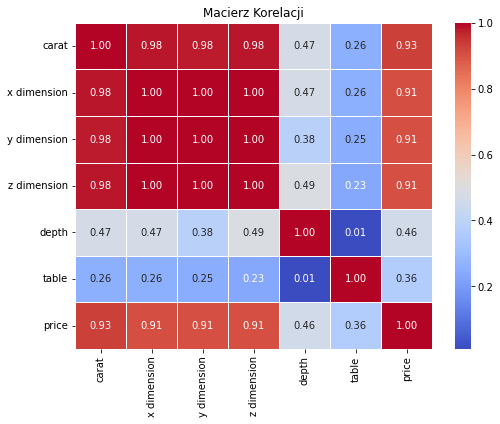

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Macierz Korelacji')
plt.show()

In [31]:
data['price'].fillna(data['price'].mean(), inplace=True)
data['x dimension'].fillna(data['y dimension'], inplace=True)
data['y dimension'].fillna(data['x dimension'], inplace=True)
data['z dimension'].fillna(data['x dimension'] * 0.62, inplace=True)
data.fillna(data.drop(columns=['price','y dimension', 'x dimension','z dimension']).median(), inplace=True)

print(f'Liczba wierszy z NaN: {data.isna().any(axis=1).sum()}')



Liczba wierszy z NaN: 0


C:\Users\konduktor\AppData\Local\Temp\ipykernel_30424\4233432552.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.drop(columns=['price','y dimension', 'x dimension','z dimension']).median(), inplace=True)


In [32]:
data.duplicated().sum()

0

Text(0.5, 0, 'wymiar z')

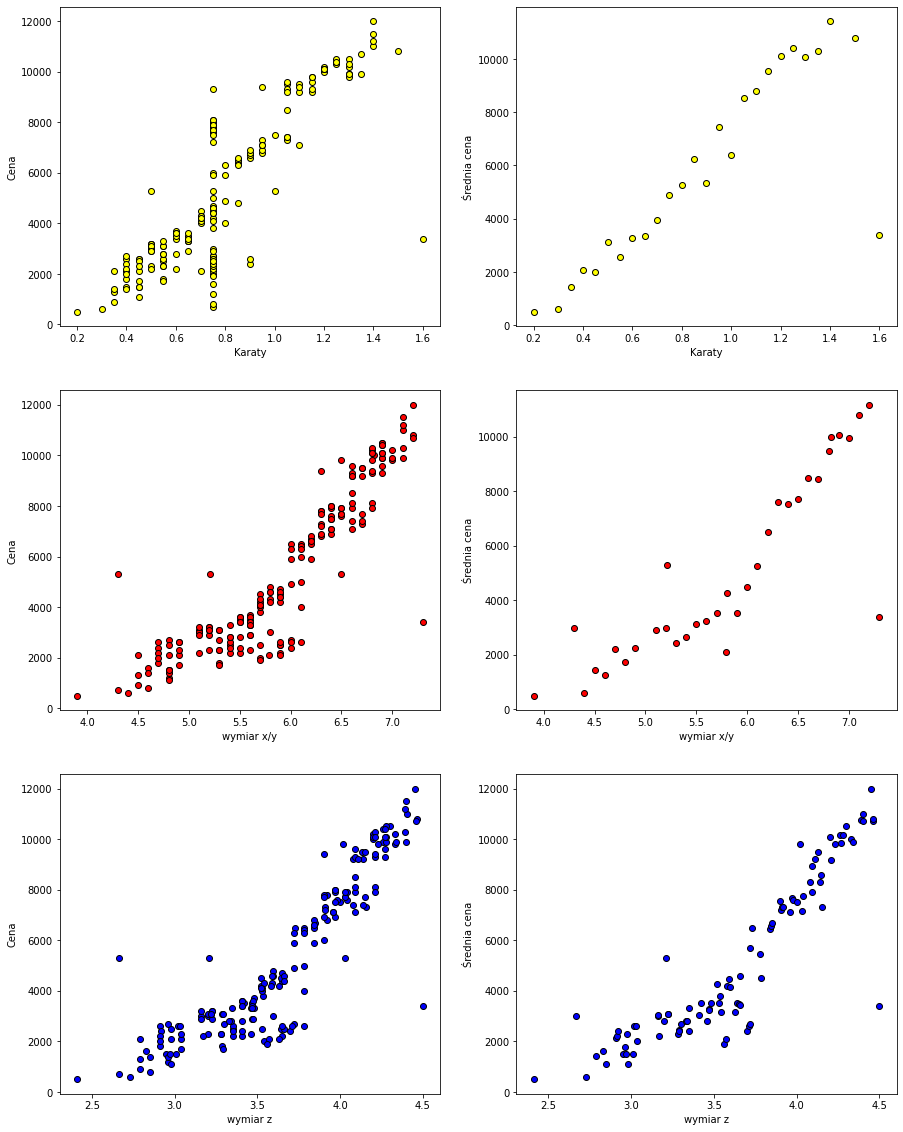

In [6]:
plt.figure(figsize=(15, 20))

y1 = data['price']
x1 = data['carat']
plt.subplot(3, 2, 1)
plt.scatter(x1, y1, color='yellow', edgecolor='black')
plt.ylabel('Cena')
plt.xlabel('Karaty')

y1 = data.groupby('carat')['price'].mean()
x1 = y1.index
plt.subplot(3, 2, 2)
plt.scatter(x1, y1, color='yellow', edgecolor='black')
plt.ylabel('Średnia cena')
plt.xlabel('Karaty')

y1 = data['price']
x1 = data['x dimension']
plt.subplot(3, 2, 3)
plt.scatter(x1, y1, color='red', edgecolor='black')
plt.ylabel('Cena')
plt.xlabel('wymiar x/y')

y1 = data.groupby('x dimension')['price'].mean()
x1 = y1.index
plt.subplot(3, 2, 4)
plt.scatter(x1, y1, color='red', edgecolor='black')
plt.ylabel('Średnia cena')
plt.xlabel('wymiar x/y')

y1 = data['price']
x1 = data['z dimension']
plt.subplot(3, 2, 5)
plt.scatter(x1, y1, color='blue', edgecolor='black')
plt.ylabel('Cena')
plt.xlabel('wymiar z')

y1 = data.groupby('z dimension')['price'].mean()
x1 = y1.index
plt.subplot(3, 2, 6)
plt.scatter(x1, y1, color='blue', edgecolor='black')
plt.ylabel('Średnia cena')
plt.xlabel('wymiar z')


In [33]:
print(data[data.carat == 1.6])
data = data[data.carat != 1.6]

    carat clarity color   cut  x dimension  y dimension  z dimension  depth  \
24    1.6      I1     I  FAIR          7.3         7.28          4.5  62.35   

    table   price  
24   54.0  3400.0  


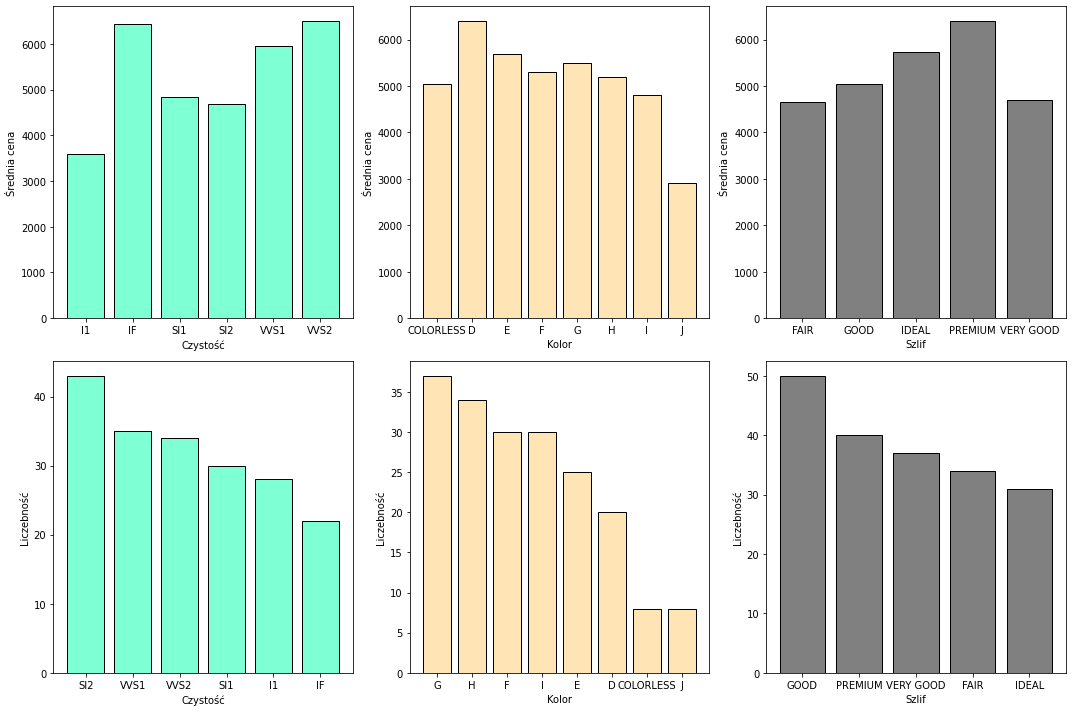

In [34]:
plt.figure(figsize=(15, 10))

price_mean_by_clarity= data.groupby('clarity')['price'].mean()
plt.subplot(2, 3, 1)
plt.bar(price_mean_by_clarity.index, price_mean_by_clarity, color='aquamarine', edgecolor='black')
plt.ylabel('Średnia cena')
plt.xlabel('Czystość')

price_mean_by_color= data.groupby('color')['price'].mean()
plt.subplot(2, 3, 2)
plt.bar(price_mean_by_color.index, price_mean_by_color, color='moccasin', edgecolor='black')
plt.ylabel('Średnia cena')
plt.xlabel('Kolor')

price_mean_by_cut= data.groupby('cut')['price'].mean()
plt.subplot(2, 3, 3)
plt.bar(price_mean_by_cut.index, price_mean_by_cut, color='grey', edgecolor='black')
plt.ylabel('Średnia cena')
plt.xlabel('Szlif')


price_mean_by_clarity = data['clarity'].value_counts()
plt.subplot(2, 3, 4)
plt.bar(price_mean_by_clarity.index, price_mean_by_clarity, color='aquamarine', edgecolor='black')
plt.ylabel('Liczebność')
plt.xlabel('Czystość')

price_mean_by_color = data['color'].value_counts()
plt.subplot(2, 3, 5)
plt.bar(price_mean_by_color.index, price_mean_by_color, color='moccasin', edgecolor='black')
plt.ylabel('Liczebność')
plt.xlabel('Kolor')

price_mean_by_cut= data['cut'].value_counts()
plt.subplot(2, 3, 6)
plt.bar(price_mean_by_cut.index, price_mean_by_cut, color='grey', edgecolor='black')
plt.ylabel('Liczebność')
plt.xlabel('Szlif')


plt.tight_layout() 
plt.show()

In [35]:
mapping_cut = {'FAIR': 1, 'GOOD': 2, 'VERY GOOD': 3, 'PREMIUM': 4, 'IDEAL': 5}
mapping_clarity = {'I1': 1, 'I2': 2, 'I3': 3, 'SI1': 4, 'SI2': 5, 'VS1': 6, 'VS2': 7, 'VVS1': 8, 'VVS2': 9, 'IF': 10, 'FL': 11}
mapping_color = {'COLORLESS':0, 'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'O': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'U': 18, 'W': 19, 'X': 20, 'Y': 21, 'Z': 22}

data_encoded = data.copy()
data_encoded['cut'].replace(mapping_cut, inplace=True)
data_encoded['clarity'].replace(mapping_clarity, inplace=True)
data_encoded['color'].replace(mapping_color, inplace=True)


In [49]:
#usunięcie arbitralnie kolumny 'table' jako słabo skorelowanej z 'price'
#data_encoded.drop(columns=['table'], inplace=True)
#data_encoded

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,price
0,0.50,10,1,5,5.10,5.15,3.200,61.50,3000.0
1,0.70,9,2,4,5.70,5.70,3.520,62.00,4500.0
2,0.75,5,5,2,4.30,4.31,2.666,62.30,700.0
3,1.20,10,1,5,6.82,6.82,4.200,61.70,10000.0
4,0.90,1,7,1,6.00,6.00,3.700,61.70,2400.0
...,...,...,...,...,...,...,...,...,...
194,0.95,4,4,5,6.40,6.42,3.960,62.35,7100.0
195,0.45,4,3,3,4.90,4.89,3.038,62.40,2300.0
196,1.25,9,5,2,6.90,6.90,4.270,62.35,10400.0
198,0.85,5,2,1,6.10,6.13,3.780,62.35,6300.0


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaled_data_np = MinMaxScaler().fit_transform(data_encoded)
scaled_data_np

scaled_data = pd.DataFrame(scaled_data_np)

scaled_data.rename(columns=dict(zip(scaled_data.columns, data_encoded.columns)), inplace=True)
scaled_data


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.230769,1.000000,0.142857,1.00,0.363636,0.380665,0.384615,0.000000,0.500000,0.217391
1,0.384615,0.888889,0.285714,0.75,0.545455,0.546828,0.540409,0.333333,0.833333,0.347826
2,0.423077,0.444444,0.714286,0.25,0.121212,0.126888,0.124635,0.533333,0.333333,0.017391
3,0.769231,1.000000,0.142857,1.00,0.884848,0.885196,0.871470,0.133333,0.666667,0.826087
4,0.538462,0.000000,1.000000,0.00,0.636364,0.637462,0.628043,0.133333,0.500000,0.165217
...,...,...,...,...,...,...,...,...,...,...
187,0.576923,0.333333,0.571429,1.00,0.757576,0.764350,0.754625,0.566667,0.333333,0.573913
188,0.192308,0.333333,0.428571,0.50,0.303030,0.302115,0.305745,0.600000,0.833333,0.156522
189,0.807692,0.888889,0.714286,0.25,0.909091,0.909366,0.905550,0.566667,0.166667,0.860870
190,0.500000,0.444444,0.285714,0.00,0.666667,0.676737,0.666991,0.566667,0.666667,0.504348


In [36]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = scaled_data.drop(columns=['price'])
X = sm.add_constant(X)
y = scaled_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [37]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
num_features = X_train.shape[1]
for i in range(num_features):
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test[X_train.columns])
    max_pvalue = max(model.pvalues)
    if max_pvalue > 0.05:
        remove_index = np.argmax(model.pvalues[1:]) + 1
        X_train = X_train.drop(X_train.columns[remove_index], axis=1)
    else:
        break

    

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test[X_train.columns])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


##Testowanie StandardScalera - standaryzacja do rozkładu o średniej 0 i odchyleniu 1

In [39]:
from sklearn.preprocessing import StandardScaler

scaled_data_np_2 = StandardScaler().fit_transform(data_encoded)

scaled_data_2 = pd.DataFrame(scaled_data_np_2)

scaled_data_2.rename(columns=dict(zip(scaled_data_2.columns, data_encoded.columns)), inplace=True)
scaled_data_2

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,-1.036821,1.330459,-1.478973,1.545981,-1.042949,-0.975710,-0.958082,-3.398791,0.060722,-0.744496
1,-0.302924,0.990315,-0.934983,0.803910,-0.245790,-0.246775,-0.271583,-1.370923,1.615199,-0.258922
2,-0.119449,-0.370261,0.696987,-0.680232,-2.105826,-2.088994,-2.103677,-0.154202,-0.716517,-1.489043
3,1.531820,1.330459,-1.478973,1.545981,1.242238,1.237603,1.187228,-2.587644,0.837961,1.521516
4,0.430974,-1.730836,1.784968,-1.422303,0.152789,0.150826,0.114573,-2.587644,0.060722,-0.938726
...,...,...,...,...,...,...,...,...,...,...
187,0.614448,-0.710405,0.152997,1.545981,0.684227,0.707468,0.672354,0.048584,-0.716517,0.582739
188,-1.220295,-0.710405,-0.390993,0.061839,-1.308668,-1.320298,-1.305622,0.251371,1.615199,-0.971097
189,1.715294,0.990315,0.696987,-0.680232,1.348526,1.343630,1.337400,0.048584,-1.493756,1.651002
190,0.247499,-0.370261,-0.934983,-1.422303,0.285648,0.323120,0.286198,0.048584,0.837961,0.323767


In [40]:
X_2 = scaled_data_2.drop(columns=['price'])
X_2 = sm.add_constant(X_2)
y_2 = scaled_data.price

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.1, random_state=42)

In [41]:
num_features = X_train_2.shape[1]
for i in range(num_features):
    model = sm.OLS(y_train_2, X_train_2).fit()
    max_pvalue = max(model.pvalues)
    if max_pvalue > 0.05:
        remove_index = np.argmax(model.pvalues[1:]) + 1
        X_train_2 = X_train_2.drop(X_train_2.columns[remove_index], axis=1)
    else:
        break

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_2 = model.predict(X_test_2[X_train_2.columns])

mse_2 = mean_squared_error(y_test_2, y_pred_2)
r2_2 = r2_score(y_test_2, y_pred_2)


In [43]:

X_3 = data_encoded.drop(columns=['price'])
X_3 = sm.add_constant(X_3)
y_3 = data_encoded.price

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.1, random_state=42)

list_mse_3=[]
list_R2_3=[]
list_adj_R2=[]
list_columns=[]

num_features = X_train_3.shape[1]
for i in range(num_features):
    model = sm.OLS(y_train_3, X_train_3).fit()

    y_pred_3 = model.predict(X_test_3[X_train_3.columns])
    list_mse_3.append(mean_squared_error(y_test_3, y_pred_3))
    r2 = r2_score(y_test_3, y_pred_3)
    list_R2_3.append(r2)
    n = len(y_test_3)
    k = X_test_3.shape[1]
    list_adj_R2.append(1 - ((1 - r2) * (n - 1) / (n - k - 1)))
    list_columns.append(' '.join(X_test_3.columns))
    
    max_pvalue = max(model.pvalues)
    if max_pvalue > 0.05:
        remove_index = np.argmax(model.pvalues[1:]) + 1
        X_train_3 = X_train_3.drop(X_train_3.columns[remove_index], axis=1)
        X_test_3 = X_test_3.drop(X_test_3.columns[remove_index], axis=1)
    else:
        break


y_pred_3 = model.predict(X_test_3[X_train_3.columns])
mse_3 = mean_squared_error(y_test_3, y_pred_3)
r2_3 = r2_score(y_test_3, y_pred_3)

Różne rodzaje skalowania nie poprawiają skuteczności modelu:

In [44]:
print(f"MinMaxScaler - MSE: {mse}")
print(f"StandardScaler - MSE: {mse_2}")
print(f"Bez skalowania - MSE: {mse_3}")

print(f"MinMaxScaler - R^2: {r2}")
print(f"StandardScaler - R^2: {r2_2}")
print(f"Bez skalowania - R^2: {r2_3}")

MinMaxScaler - MSE: 0.009199290652042957
StandardScaler - MSE: 0.009199290652042936
Bez skalowania - MSE: 1216606.1887326918
MinMaxScaler - R^2: 0.830872466034667
StandardScaler - R^2: 0.8308724660346689
Bez skalowania - R^2: 0.830872466034667


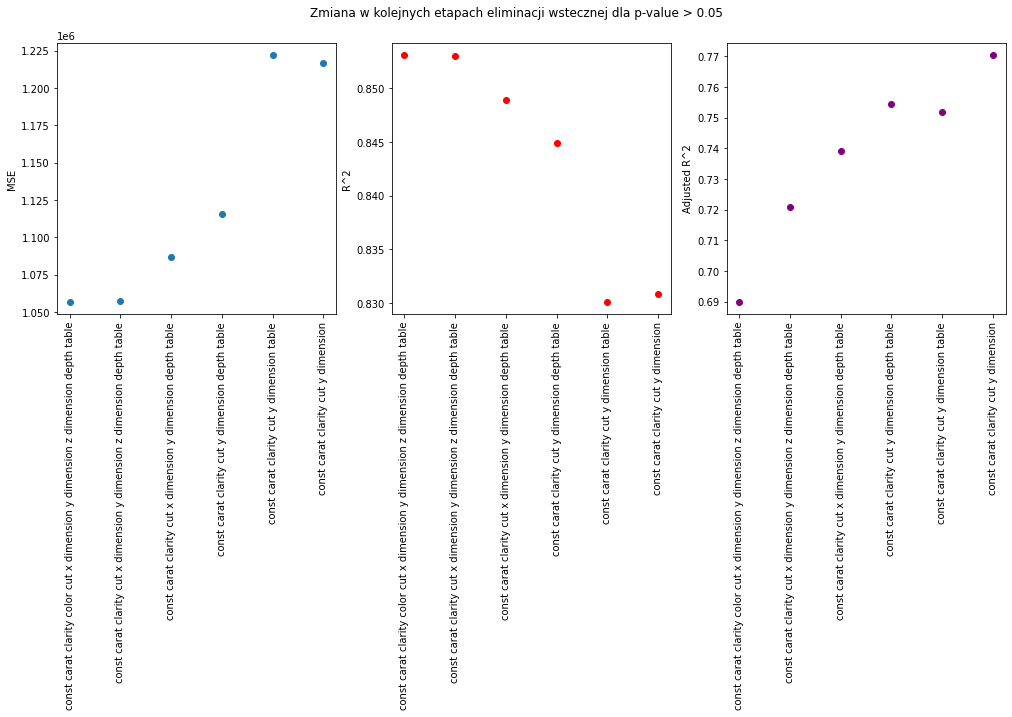

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,5))

plt.suptitle('Zmiana w kolejnych etapach eliminacji wstecznej dla p-value > 0.05')
plt.subplot(1,3,1)
plt.scatter(range(len(list_columns)), list_mse_3)
plt.xticks(range(len(list_columns)), list_columns, rotation=90)
plt.ylabel('MSE')

plt.subplot(1,3,2)
plt.scatter(range(len(list_columns)), list_R2_3, color='red')
plt.ylabel('R^2')
plt.xticks(range(len(list_columns)), list_columns, rotation=90)

plt.subplot(1,3,3)
plt.scatter(range(len(list_columns)), list_adj_R2, color='purple')
plt.ylabel('Adjusted R^2')
plt.xticks(range(len(list_columns)), list_columns, rotation=90)

plt.show()

In [48]:
final_columns = ['carat', 'clarity', 'cut', 'y dimension']
X_final = data_encoded[final_columns]
X_final = sm.add_constant(X_final)
y_final = data_encoded.price

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.1, random_state=42)


final_model = sm.OLS(y_train_final, X_train_final).fit()

y_pred_final = final_model.predict(X_test_final[X_train_final.columns])
mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)

print(f"Final - MSE: {mse_final}")

print(f"Final - R^2: {r2_final}")


n = len(X_test_final)
k = X_test_final.shape[1]
print(f"Final - Adjusted R^2: {   1 - ((1 - r2_final) * (n - 1) / (n - k - 1))}")

Final - MSE: 1216606.1887326918
Final - R^2: 0.830872466034667
Final - Adjusted R^2: 0.7704697753327624


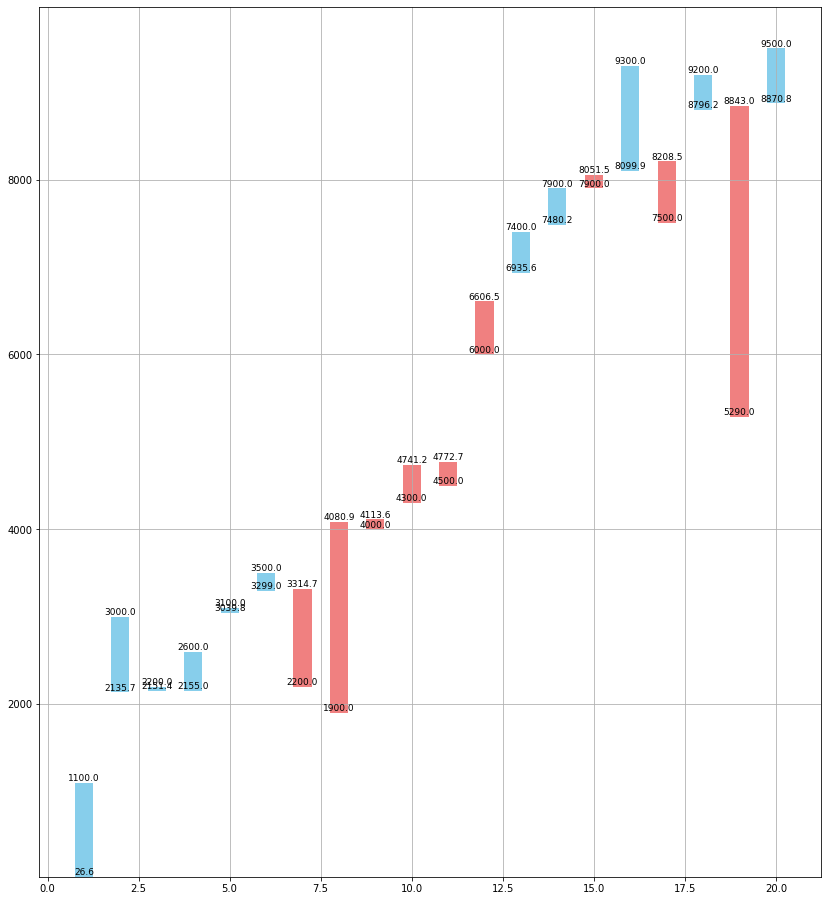

In [53]:
residuals_df = pd.concat([y_test_final, y_pred_final], axis=1, keys=['price_real', 'price_pred'])
residuals_df = residuals_df.sort_values(by='price_pred')


absolute = True
full_price_x_axis_scale = False
pred_val_labels = True
real_val_labels = True
grid = True
labels_font_size = 9



plt.figure(figsize=(14,16))

price_x_axis =residuals_df['price_pred'] if full_price_x_axis_scale else range(1, len(residuals_df['price_pred']) + 1)
bars_width = 15 if full_price_x_axis_scale else 0.5
bottom_vals = residuals_df['price_pred'] if absolute else None
colors = ['skyblue' if pred > real else 'lightcoral' for pred, real in zip(residuals_df['price_real'], residuals_df['price_pred'])]
bars = plt.bar(price_x_axis, residuals_df['price_real']-residuals_df['price_pred'],width=bars_width, bottom=bottom_vals, color = colors);

for bar in bars:
    height_max = bar.get_height() + bar.get_y()
    if real_val_labels:
        plt.text(bar.get_x() + bar.get_width() / 2, height_max, str(round(height_max,1)), ha='center', va='bottom', rotation='horizontal', fontsize=labels_font_size)
    height_min = bar.get_y()
    if(absolute &  pred_val_labels):
        plt.text(bar.get_x() + bar.get_width() / 2, height_min , str(round(height_min,1)), ha='center', va='bottom', rotation='horizontal', fontsize=labels_font_size)


if grid:
    plt.grid()



ZAPIS zbiorów danych do wykorzystania w dashboardzie

In [50]:
data.to_csv('data.csv', index=False)
data_encoded.to_csv('data_encoded.csv', index=False)
data_encoded[final_columns+['price']].to_csv('data_selected.csv', index=False)

X_train_final.to_csv('X_train_final.csv', index=False)
y_train_final.to_csv('y_train_final.csv', index=False)
X_test_final.to_csv('X_test_final.csv', index=False)
y_test_final.to_csv('y_test_final.csv', index=False)


Zapis modelu do wykorzystania w dashboardzie

In [51]:
import joblib

joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']